# Ames Housing Sale Price Analysis

Jaehak J. Kim

## Executive Summary

For this project, Descriptive statistics and data visualization will be used to produce a report about the Ames Housing dataset

## The Data
This project uses the Ames Housing dataset containing home sales in Ames, Iowa 2006 through 2010.
- Each record(row) represents a home sold in Ames, IA.
- Each feature(column) is some attribute of that home sale
- There are 80 columns in total

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = "https://github.com/learn-co-curriculum/da-phase1-project-enterprise/raw/main/data/ames.csv"
df = pd.read_csv(file_path, index_col=0)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Distribution of `SalePrice`

Text(0.5, 1.0, 'Distribution of Sales Prices')

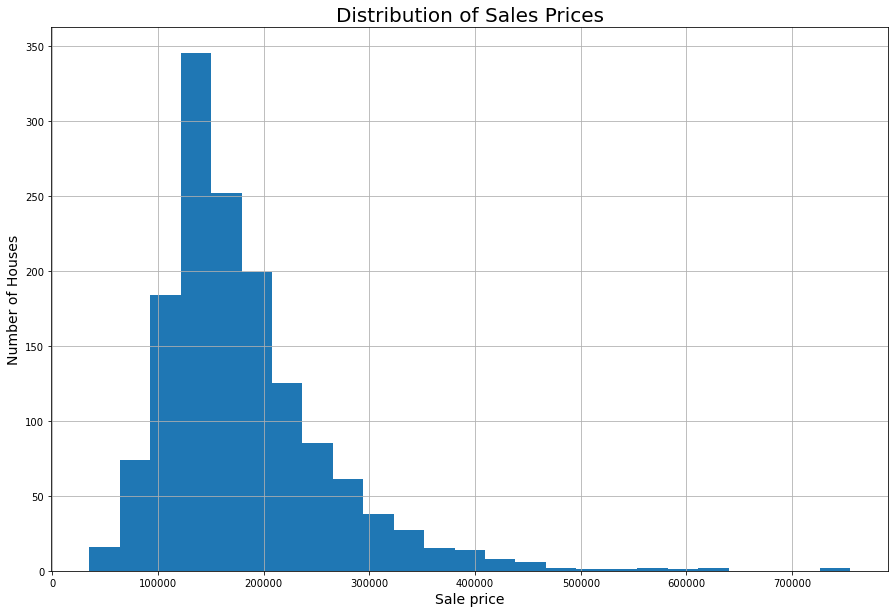

In [3]:
df['SalePrice'].hist(bins= 25, figsize=(15,10))
plt.xlabel('Sale price', fontsize=14)
plt.ylabel('Number of Houses', fontsize=14)
plt.title('Distribution of Sales Prices', fontsize=20)

TODO: write an interpretation in Markdown of what you see in the above distribution
- The distribution is skewed to right
- There are outliers to the most expensive houses, which means there were far less sales in that category
- The mean is right of the peak
- Most house sales were priced between 100,000 dollars to 200,000 dollars range.

## Differences between Subsets
 Following above_average, average, below_average subsets are created from ['OverallCond'] column to see the relationship between ['SalePrice'] and overall condition of the houses.

In [4]:
housing_subset = df[['OverallCond','SalePrice']]
housing_subset.head()

,OverallCond,SalePrice
Id,,
1,5,208500
2,8,181500
3,5,223500
4,5,140000
5,5,250000


In [5]:
above_average = housing_subset[housing_subset['OverallCond'] > 5 ]
average = housing_subset[housing_subset['OverallCond'] == 5 ]
below_average = housing_subset[housing_subset['OverallCond'] < 5 ]

In [6]:
df = df.reset_index(level=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


OverallCond
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SalePrice, dtype: object

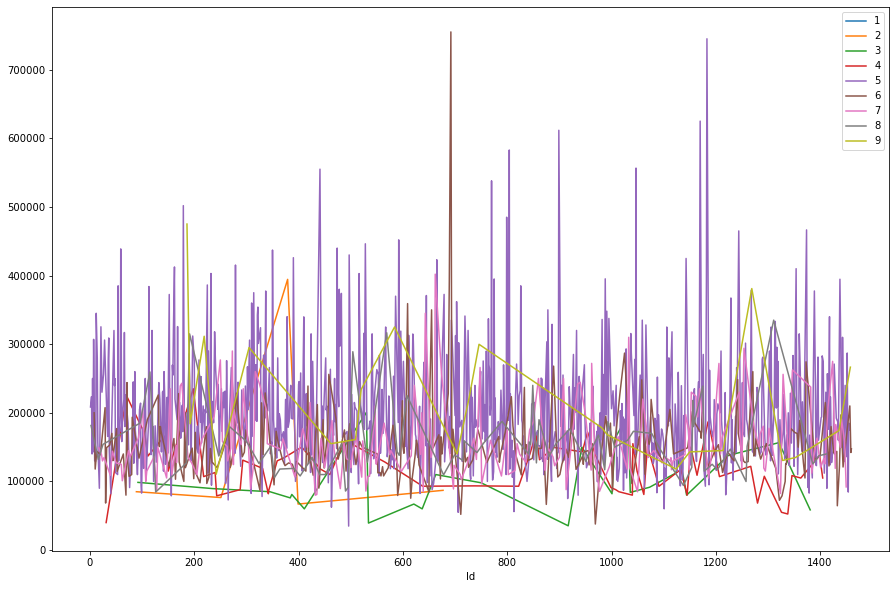

In [7]:
# TODO: write code to create one or more plots that shows the 
# difference in SalePrice between subset
df.set_index('Id', inplace=True)
df.groupby('OverallCond')['SalePrice'].plot(legend=True, figsize=(15,10))

Though I can't completely plot, by looking at the graph in Project Description page I could see:
- There is little corelation between overall condition of the house and sales price
- It seems that most overall condition numbers are between 100,000 dollars and 300,000 dollars range.
- This also tells me most of the houses sold were in that price range
- Below average condition is heavily concentrated in the lower range of the price overall

## Correlation between `Neighborhood` and `SalePrice`

In [8]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [9]:
df.corr()['SalePrice']
df['OverallQual'].corr(df['SalePrice'])

0.7909816005838051

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

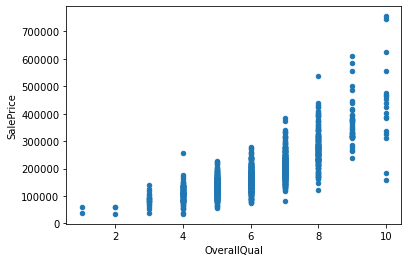

In [10]:
df.plot(x= 'OverallQual', y= 'SalePrice', kind= 'scatter')

- There is somewhat strong correlation between Salesprice of the house and the overall quality of the house.
- Tendency is that as price goes up, generally quality also goes up.
- Upper priced houses don't have low quality period.
- There is no highest quality house under 100,000 dollars

## Engineered Feature: ['Age']

In [11]:
df['Age'] = df.apply(lambda x: x['YrSold'] - x['YearBuilt'], axis=1)
#df'

<AxesSubplot:xlabel='Age', ylabel='SalePrice'>

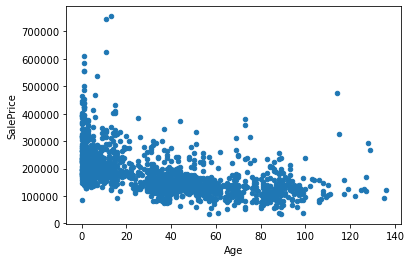

In [12]:
df.plot(x= 'Age', y= 'SalePrice', kind= 'scatter')

- There is a strong correlation between the age of a house and the sales price of a house
- Inverse proportion where as the increases the sales price decreases
- Newer the house, it tends to be more expensive